In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
fraud_df = pd.read_csv("D:\Prayag Files\TIET\Extras\Kavac hackathon\Dtaset\Fraud.csv")
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
fraud_df.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

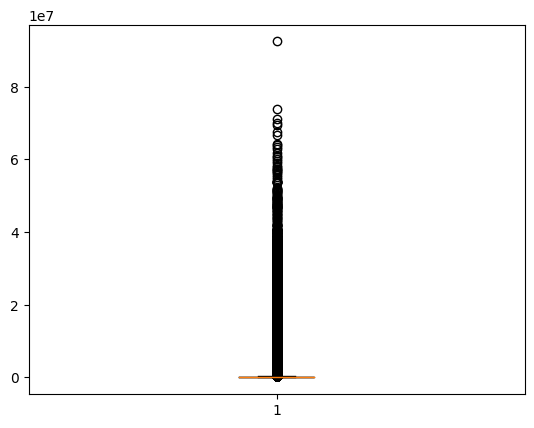

In [6]:
plt.boxplot(fraud_df['amount'])
plt.show()

In [7]:
fraud_df.query('amount>80000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [8]:
indexNames = fraud_df[fraud_df['amount'] > 80000000].index
fraud_df.drop(indexNames , inplace=True)

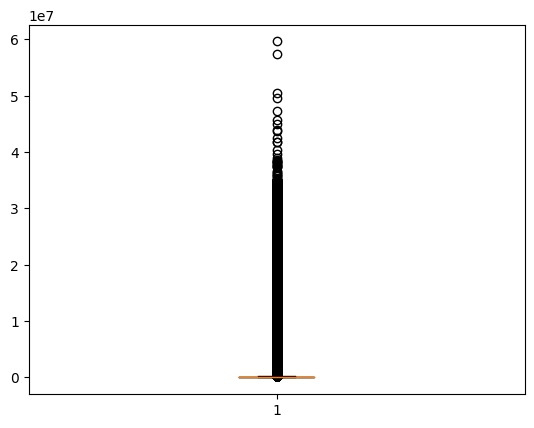

In [9]:
plt.boxplot(fraud_df['oldbalanceOrg'])
plt.show()

In [10]:
fraud_df.query('oldbalanceOrg>50000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0


In [11]:
indexNames = fraud_df[fraud_df['oldbalanceOrg'] > 50000000].index
fraud_df.drop(indexNames , inplace=True)

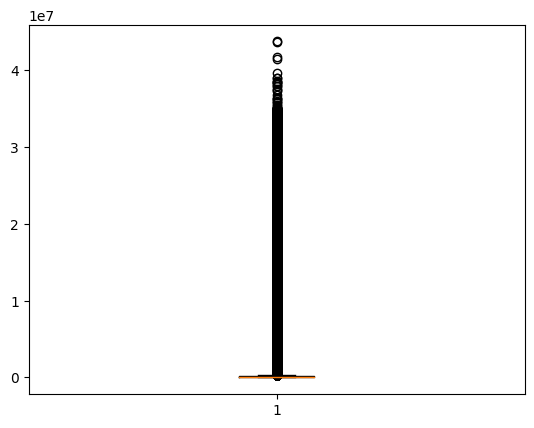

In [12]:
plt.boxplot(fraud_df['newbalanceOrig'])
plt.show()

In [13]:
fraud_df.query('newbalanceOrig>40000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,C438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0


In [14]:
indexNames = fraud_df[fraud_df['newbalanceOrig'] > 40000000].index
fraud_df.drop(indexNames , inplace=True)

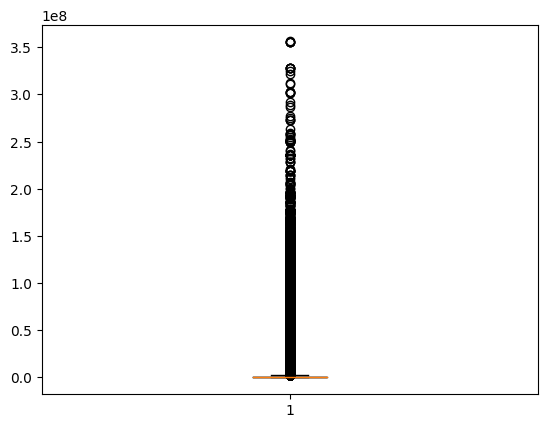

In [15]:
plt.boxplot(fraud_df['oldbalanceDest'])
plt.show()

In [16]:
fraud_df.query('oldbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
5920180,404,CASH_OUT,163389.56,C1323053481,0.00,0.00,C439737079,3.560159e+08,3.561793e+08,0,0


In [17]:
indexNames = fraud_df[fraud_df['oldbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

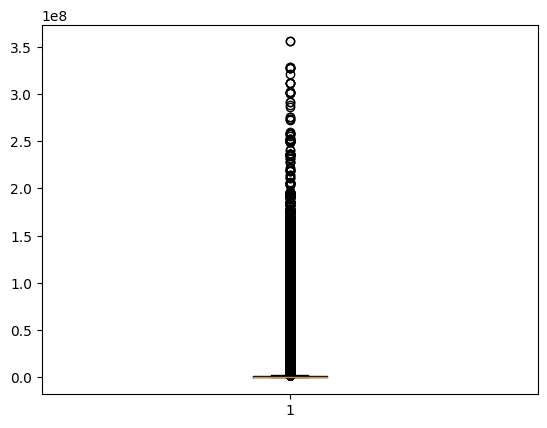

In [18]:
plt.boxplot(fraud_df['newbalanceDest'])
plt.show()

In [19]:
fraud_df.query('newbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4124250,302,TRANSFER,3325263.90,C1812458696,0.0,0.0,C439737079,3.215898e+08,355553416.3,0,0
4133583,302,TRANSFER,30638354.89,C1800693711,0.0,0.0,C439737079,3.249151e+08,355553416.3,0,0


In [20]:
indexNames = fraud_df[fraud_df['newbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

In [21]:
fraud_df['isFraud'].unique()

array([0, 1], dtype=int64)

In [22]:
fraud_df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [23]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
num_fraud_df = fraud_df[['step', 'amount', 'oldbalanceOrg',
                         'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                         'isFraud', 'isFlaggedFraud']]
num_fraud_df.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [25]:
X = num_fraud_df[list(num_fraud_df)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,547.616120,newbalanceOrig
2,545.307261,oldbalanceOrg
5,83.919587,newbalanceDest
4,72.236866,oldbalanceDest
1,4.078319,amount
0,1.191735,step
6,1.188005,isFraud
7,1.002548,isFlaggedFraud


In [26]:
num_fraud_df['balanceOrigDiff'] = num_fraud_df['oldbalanceOrg'] - num_fraud_df['newbalanceOrig']
final_df = num_fraud_df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)
final_df.head()

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
0,1,9839.64,0.0,0.0,0,0,9839.64
1,1,1864.28,0.0,0.0,0,0,1864.28
2,1,181.00,0.0,0.0,1,0,181.00
3,1,181.00,21182.0,0.0,1,0,181.00
4,1,11668.14,0.0,0.0,0,0,11668.14


In [27]:
amount_fraud_df = fraud_df.groupby(['type'])[['amount']].mean()
amount_fraud_df = amount_fraud_df.reset_index()
amount_fraud_df.head()

,type,amount
0,CASH_IN,168920.220537
1,CASH_OUT,176273.944698
2,DEBIT,5483.665314
3,PAYMENT,13057.606984
4,TRANSFER,910364.274711


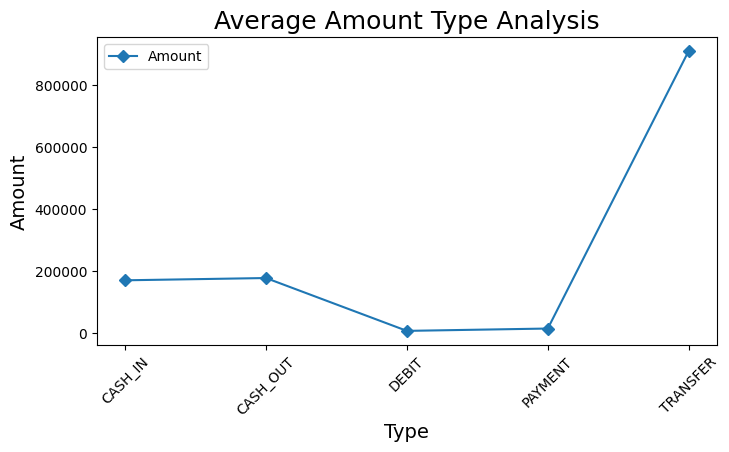

In [28]:
x = amount_fraud_df.loc[:, 'type']
y1 = amount_fraud_df['amount']

plt.figure(figsize = (8, 4))

plt.plot(x, y1, marker='D', label = 'Amount')

plt.xlabel('Type', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.title('Average Amount Type Analysis', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=45)
plt.show()

In [29]:
final_df_corr = final_df.corr()
final_df_corr

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
step,1.000000,0.022392,0.027742,0.025945,0.031551,0.003277,0.007182
amount,0.022392,1.000000,0.295605,0.461208,0.076651,0.012321,0.102135
oldbalanceDest,0.027742,0.295605,1.000000,0.976387,-0.005912,-0.000516,-0.047750
newbalanceDest,0.025945,0.461208,0.976387,1.000000,0.000547,-0.000531,-0.006460
isFraud,0.031551,0.076651,-0.005912,0.000547,1.000000,0.044117,0.362041
isFlaggedFraud,0.003277,0.012321,-0.000516,-0.000531,0.044117,1.000000,0.000230
balanceOrigDiff,0.007182,0.102135,-0.047750,-0.006460,0.362041,0.000230,1.000000


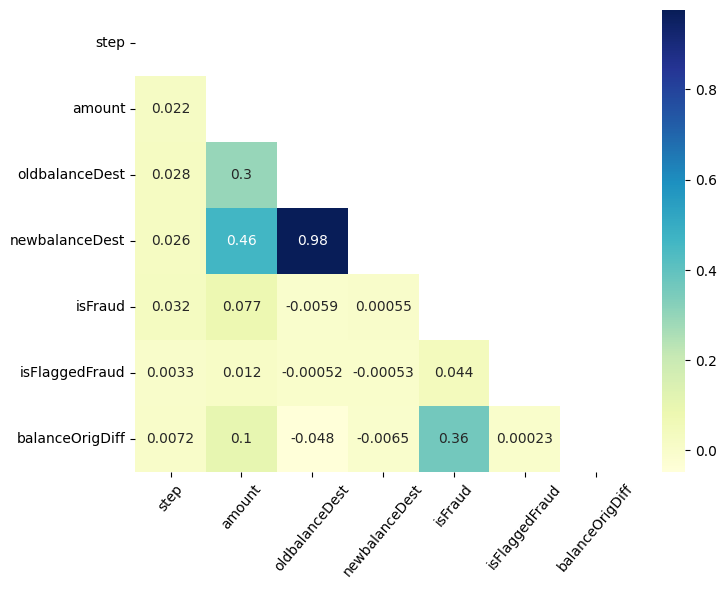

In [31]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=50)
plt.show()

In [32]:
cor_target = abs(final_df_corr["isFraud"])

relevant_train_features = cor_target[cor_target>0.25]
relevant_train_features

isFraud            1.000000
balanceOrigDiff    0.362041
Name: isFraud, dtype: float64

In [33]:
final_fraud_data = final_df[['balanceOrigDiff', 'isFraud']]
final_fraud_data.head()

,balanceOrigDiff,isFraud
0,9839.64,0
1,1864.28,0
2,181.00,1
3,181.00,1
4,11668.14,0


In [34]:
final_fraud_data['isFraud'].value_counts()

0    6354395
1       8210
Name: isFraud, dtype: int64

In [35]:
X = final_fraud_data.drop(['isFraud'], axis=1)
y = final_fraud_data['isFraud']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(5090084, 1) (1272521, 1) (5090084,) (1272521,)


In [37]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
log_reg_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 99.91%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

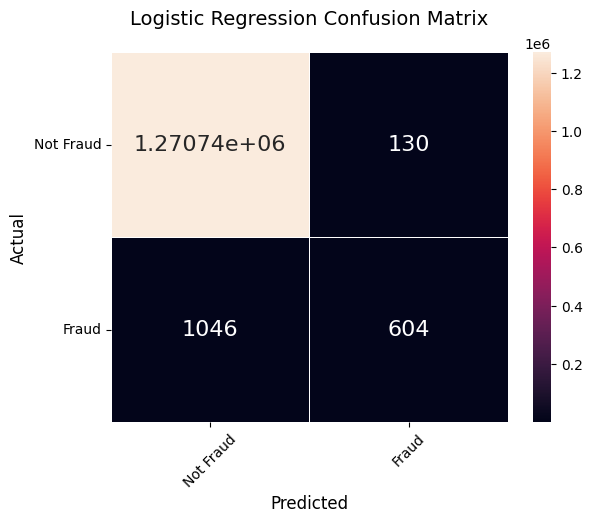

In [40]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [41]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270871
       Fraud       0.82      0.37      0.51      1650

    accuracy                           1.00   1272521
   macro avg       0.91      0.68      0.75   1272521
weighted avg       1.00      1.00      1.00   1272521

